Make sure you are using python 3

In [1]:
# check python version
from platform import python_version

print(python_version())

3.7.4


Got the New York arrest data from here:

https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/index.html

In [2]:
# download data
URL = 'https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/all.xls'
filename = 'all.xls'
from urllib.request import urlretrieve
urlretrieve(URL,filename)

('all.xls', <http.client.HTTPMessage at 0x10d5801d0>)

In [3]:
# make sure the downloaded file is ignored so it's not in the github folder

This dataset has the county data in different sheets. For example, this is data from the Franklin county tab.

In [4]:
import pandas as pd
# import data from the Franklin sheet. only include parts of the spreadsheet that includes data
# we are inetrested in
Franklin = pd.read_excel('all.xls', sheet_name = "Albany", skiprows = 15,nrows =2, usecols = "C,E:J")
Franklin

,Unnamed: 2,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown
0,Total Arrests,7132,3242,3035,630,75,150
1,Felony Total,2555,928,1302,254,19,52


In [5]:
# do this for all counties

In [6]:
# Get the list of sheet names
xl = pd.ExcelFile('all.xls')

sheetnames = xl.sheet_names  # see all sheet names

sheetnames[1:5]

['NewYorkState', 'NYC', 'Non-NYC', 'Albany']

In [7]:
# check the length 
len(sheetnames)

66

In [8]:
# only get the county names. ignore first three rows
counties = sheetnames[4:66]

In [9]:
# makes sure we only have data from 62 counties
len(counties)

62

In [10]:
# create empty data frame
column_names = ["Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
df = pd.DataFrame(columns = column_names)

In [11]:
# sort counties in alphabetical order
counties.sort()

In [12]:
# run a loop to extract data from each sheet
data = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =1, usecols = "C,E:J")
    county = [[]] * 1
    county[0].append(sheetname)
    countydata['County'] = county
    data.append(countydata)

In [13]:
# Append data to dataframe
df = df.append(data, True)

In [14]:
# Check how it looks
df.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County
0,7132,3242,3035,630,75,150,Total Arrests,[Albany]
1,830,755,55,12,3,5,Total Arrests,[Allegany]
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx]
3,5091,3396,1236,363,45,51,Total Arrests,[Broome]
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus]


Now, get county population data from here: 
https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k

In [15]:
# get population by county
url2 = 'https://data.ny.gov/api/views/krt9-ym2k/rows.csv?accessType=DOWNLOAD&bom=true&format=true&sorting=true'
filename2 = 'population.csv'
from urllib.request import urlretrieve
urlretrieve(url2,filename2)

('population.csv', <http.client.HTTPMessage at 0x11e0df090>)

In [16]:
import pandas as pd
population = pd.read_csv('population.csv')
# examine data. It seems like this has data for a lot of years
population.shape

(3465, 5)

In [17]:
population.head()

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2019,Postcensal Population Estimate,"19,453,561"
1,36001,Albany County,2019,Postcensal Population Estimate,"305,506"
2,36003,Allegany County,2019,Postcensal Population Estimate,"46,091"
3,36005,Bronx County,2019,Postcensal Population Estimate,"1,418,207"
4,36007,Broome County,2019,Postcensal Population Estimate,"190,488"


In [18]:
# Extract population data from 2018
population18 = population[population.Year == 2018]
len(population18)

63

In [19]:
# exclude the total population
population_c = population18[1:63]

In [20]:
# Make sure it's the same length as the county list
len(population_c)

62

In [21]:
# extract just the poulation
population_ce = population_c["Population"]
population_ce.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index

In [22]:
# combine the population with the original table
df2 = pd.concat([df,population_ce], axis=1)
df2

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585"
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332"
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087"
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925"
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726"
...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274"
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200"
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213"
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023"


In [23]:
# Calculate the percentage of arrest for each race
df2['%blackarrest'] = df2['Black']/df2['Total Arrests']*100
df2['%whitearrest'] = df2['White']/df2['Total Arrests']*100
df2['%hisparrest'] = df2['Hispanic']/df2['Total Arrests']*100
df2['%asianarrest'] = df2['Asian']/df2['Total Arrests']*100
df2.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275


Race demographic data was obtained from here:

https://labor.ny.gov/stats/nys/statewide-population-data.shtm

In [24]:
# Get race percentage from the 2010 cencus data 
# Assuming it's similar in 2018
# using "requests" because urllib didn't work

import requests
url3 = 'https://labor.ny.gov/stats/nys/PopCompare-Race-Ethnicity-2000-2010.xls'


r = requests.get(url3)
output = open('demographic.xls', 'wb')
output.write(r.content)
output.close() 


In [25]:
demographic = pd.read_excel('demographic.xls',skiprows = 4, usecols = "A,J:M")
demographic.head()

,Area,% White*.1,% Black* .1,% Asian* .1,% Hispanic
0,New York State,0.583000,0.144000,0.073000,0.176000
1,Downstate (10 county),0.444668,0.183366,0.101227,0.246201
2,Upstate (52 county),0.828062,0.073597,0.021994,0.053038
3,Capital,0.844021,0.065007,0.026737,0.039473
4,Albany,0.759859,0.119643,0.047665,0.049036


## Cleaning up race demographic data

In [26]:
# Extract only data from counties (ignore other rows)
chunk1 = demographic.iloc[4:12]

chunk1.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk1.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk1

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Columbia,0.882338,0.042649,0.015817,0.038893
2,Greene,0.870706,0.052945,0.007761,0.049146
3,Rensselaer,0.856525,0.060165,0.021759,0.038136
4,Saratoga,0.927325,0.013902,0.017668,0.024038
5,Schenectady,0.771740,0.087431,0.031779,0.057049
6,Warren,0.952486,0.008462,0.006833,0.017928
7,Washington,0.933245,0.027430,0.004113,0.022874


In [27]:
# extract
chunk2 = demographic.iloc[13:18]


chunk2.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk2.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk2

,Area,%White,%Black,%Asian,%Hispanic
0,Cayuga,0.913428,0.037600,0.004836,0.023692
1,Cortland,0.937490,0.014290,0.008351,0.022174
2,Madison,0.938373,0.017156,0.007843,0.017919
3,Onondaga,0.792333,0.104268,0.030769,0.040317
4,Oswego,0.950716,0.007059,0.005806,0.020899


In [28]:
# extract
chunk3 = demographic.iloc[19:28]


chunk3.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk3.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk3

,Area,%White,%Black,%Asian,%Hispanic
0,Genesee,0.915295,0.024817,0.005909,0.026898
1,Livingston,0.922056,0.022801,0.011928,0.027556
2,Monroe,0.728204,0.144353,0.032274,0.072554
3,Ontario,0.918355,0.020624,0.010294,0.034087
4,Orleans,0.878157,0.055220,0.004034,0.040972
5,Seneca,0.907747,0.042921,0.006752,0.027006
6,Wayne,0.909845,0.029252,0.004959,0.037069
7,Wyoming,0.902432,0.052971,0.003701,0.029510
8,Yates,0.961457,0.007732,0.003787,0.016609


In [29]:
# extract
chunk4 = demographic.iloc[30:28]


chunk4.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk4

,Area,%White,%Black,%Asian,%Hispanic


In [30]:
chunk4 = demographic.iloc[29:36]
chunk4.reset_index(drop=True,inplace=True) 
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk4

,Area,%White,%Black,%Asian,%Hispanic
0,Dutchess,0.745617,0.092088,0.034724,0.105103
1,Orange,0.682001,0.090917,0.023296,0.180211
2,Putnam,0.829496,0.020530,0.018373,0.116949
3,Rockland,0.653444,0.111083,0.061276,0.156513
4,Sullivan,0.745097,0.081873,0.013321,0.136098
5,Ulster,0.817012,0.054698,0.016768,0.087176
6,Westchester,0.573760,0.133372,0.053864,0.218132


In [31]:
chunk5 = demographic.iloc[37:39]
chunk5.reset_index(drop=True,inplace=True) 
chunk5.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk5

,Area,%White,%Black,%Asian,%Hispanic
0,Nassau,0.654937,0.105488,0.075816,0.145838
1,Suffolk,0.715658,0.068381,0.033679,0.164890


In [32]:
chunk6 = demographic.iloc[40:46]
chunk6.reset_index(drop=True,inplace=True) 
chunk6.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk6

,Area,%White,%Black,%Asian,%Hispanic
0,Fulton,0.938395,0.017666,0.005763,0.022744
1,Herkimer,0.956152,0.009920,0.005037,0.016119
2,Montgomery,0.850913,0.014178,0.007089,0.112587
3,Oneida,0.848330,0.058252,0.027768,0.046062
4,Otsego,0.927320,0.015387,0.010601,0.030855
5,Schoharie,0.938716,0.012031,0.006626,0.028215


In [33]:
chunk7 = demographic.iloc[47:52]
chunk7.reset_index(drop=True,inplace=True) 
chunk7.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk7

,Area,%White,%Black,%Asian,%Hispanic
0,Bronx,0.109168,0.300839,0.034174,0.535275
1,Kings,0.356652,0.319027,0.103856,0.198141
2,New York,0.480173,0.129481,0.112004,0.254483
3,Queens,0.276470,0.177468,0.227879,0.275135
4,Richmond,0.640388,0.094538,0.074023,0.172916


In [34]:
chunk8 = demographic.iloc[53:60]
chunk8.reset_index(drop=True,inplace=True) 
chunk8.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk8

,Area,%White,%Black,%Asian,%Hispanic
0,Clinton,0.911163,0.035956,0.010837,0.025010
1,Essex,0.929337,0.024943,0.006604,0.025222
2,Franklin,0.826373,0.054924,0.004167,0.029187
3,Hamilton,0.964433,0.006824,0.004963,0.010546
4,Jefferson,0.857634,0.047105,0.012596,0.052853
5,Lewis,0.968177,0.006276,0.002658,0.013180
6,St. Lawrence,0.928527,0.020180,0.009594,0.019170


In [35]:
chunk9 = demographic.iloc[61:69]
chunk9.reset_index(drop=True,inplace=True) 
chunk9.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk9

,Area,%White,%Black,%Asian,%Hispanic
0,Broome,0.862782,0.044118,0.034990,0.033789
1,Chemung,0.874063,0.062231,0.011719,0.025217
2,Chenango,0.956178,0.006399,0.003962,0.018404
3,Delaware,0.931763,0.014402,0.007566,0.032514
4,Schuyler,0.962002,0.007796,0.002780,0.012757
5,Steuben,0.944297,0.015022,0.011627,0.013850
6,Tioga,0.960489,0.006826,0.007257,0.013575
7,Tompkins,0.802351,0.037149,0.085463,0.041983


In [36]:
chunk10 = demographic.iloc[70:75]
chunk10.reset_index(drop=True,inplace=True) 
chunk10.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk10

,Area,%White,%Black,%Asian,%Hispanic
0,Allegany,0.954133,0.010093,0.009214,0.013689
1,Cattaraugus,0.919469,0.012027,0.006524,0.016746
2,Chautauqua,0.892947,0.020481,0.005011,0.061087
3,Erie,0.777067,0.130480,0.025702,0.045407
4,Niagara,0.872675,0.067035,0.008348,0.021684


In [37]:
# Combine all chunks of data
upchunk = pd.concat([chunk1,chunk2], axis=0)
upchunk = pd.concat([upchunk,chunk3], axis=0)
upchunk = pd.concat([upchunk,chunk4], axis=0)
upchunk = pd.concat([upchunk,chunk5], axis=0)
upchunk = pd.concat([upchunk,chunk6], axis=0)
upchunk = pd.concat([upchunk,chunk7], axis=0)
upchunk = pd.concat([upchunk,chunk8], axis=0)
upchunk = pd.concat([upchunk,chunk9], axis=0)
upchunk = pd.concat([upchunk,chunk10], axis=0)


In [38]:
# sort the data by counties so that it matches the other dataframe
upchunk = upchunk.sort_values(by=['Area'])

In [39]:
# check the length to make sure there's only 62
len(upchunk)

62

In [40]:
# reset index 
upchunk.reset_index(drop=True,inplace=True)
# combine with last table
df3 = pd.concat([df2,upchunk], axis=1)

In [41]:
# check data types
df3.dtypes

Total Arrests     object
White             object
Black             object
Hispanic          object
Asian             object
Other-Unknown     object
Unnamed: 2        object
County            object
Population        object
%blackarrest      object
%whitearrest      object
%hisparrest       object
%asianarrest      object
Area              object
%White           float64
%Black           float64
%Asian           float64
%Hispanic        float64
dtype: object

In [42]:
# remove the commas
df3 = df3.replace(',','', regex=True)

# Can't convert object to int directly. need to convert to float first
df3['Population'] = df3['Population'].astype(float)

# convert to numbers
df3['White'] = df3['White'].astype('float')
df3['Black'] = df3['Black'].astype('float')
df3['Hispanic'] = df3['Hispanic'].astype('float')
df3['Asian'] = df3['Asian'].astype('float')
df3['Other-Unknown'] = df3['Other-Unknown'].astype('float')


df3['%White'] = df3['%White'].astype('float')
df3['%Black'] = df3['%Black'].astype('float')
df3['%Hispanic'] = df3['%Hispanic'].astype('float')
df3['%Asian'] = df3['%Asian'].astype('float')

# calculate arrest/population
df3['blackarr/pop'] = df3['Black']*100/(df3['Population']*df3['%Black'])
df3['whitearr/pop'] = df3['White']*100/(df3['Population']*df3['%White'])


df3['%blackarrest'] = df3['%blackarrest'].astype('float')
df3['%whitearrest'] = df3['%whitearrest'].astype('float')
df3['%hisparrest'] = df3['%hisparrest'].astype('float')
df3['%asianarrest'] = df3['%asianarrest'].astype('float')



In [43]:
# calculate percentage of population for each race
df3['%White'] = df3['%White']*100
df3['%Black'] = df3['%Black']*100
df3['%Asian'] = df3['%Asian']*100
df3['%Hispanic'] = df3['%Hispanic']*100

df3[1:5]

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest,Area,%White,%Black,%Asian,%Hispanic,blackarr/pop,whitearr/pop
1,830,755.0,55.0,12.0,3.0,5.0,Total Arrests,[Allegany],46332.0,6.626506,90.963855,1.445783,0.361446,Allegany,95.413313,1.009276,0.921424,1.368855,11.761749,1.707878
2,47413,1781.0,21437.0,23196.0,618.0,381.0,Total Arrests,[Bronx],1432087.0,45.213338,3.756354,48.923291,1.303440,Bronx,10.916766,30.083936,3.417423,53.527451,4.975766,1.139201
3,5091,3396.0,1236.0,363.0,45.0,51.0,Total Arrests,[Broome],191925.0,24.278138,66.705952,7.130230,0.883913,Broome,86.278166,4.411765,3.499003,3.378863,14.597369,2.050856
4,1697,1318.0,150.0,36.0,10.0,183.0,Total Arrests,[Cattaraugus],76726.0,8.839128,77.666470,2.121391,0.589275,Cattaraugus,91.946910,1.202734,0.652415,1.674614,16.254704,1.868253


In [44]:
# Import packages needed for ggplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotnine import *


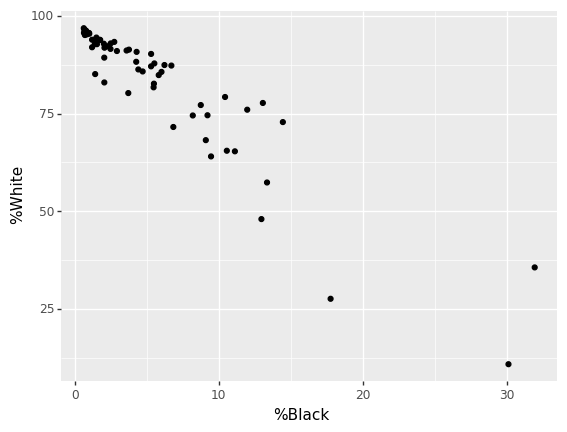

<ggplot: (7016892829)>

In [45]:
# Quick look at county demographics
ggplot(df3, aes(x= '%Black', y='%White')) + geom_point()

# Repeate for felony data

In [46]:
# List of sheet names
xl = pd.ExcelFile('all.xls')
sheetnames = xl.sheet_names  

counties = sheetnames[4:66]
column_names = ["Unnamed: 2","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
felony_df = pd.DataFrame(columns = column_names)
# run a loop to extract data from each sheet
data2 = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =2, usecols = "C,E:J")
    county = [[]] * 2
    county[0].append(sheetname)
    countydata['County'] = county
    data2.append(countydata)


In [47]:
# Append data, rename columns
felony_df = felony_df.append(data2, True)
felony_df.columns = ["category","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown","County"]
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
0,Total Arrests,7132,3242,3035,630,75,150,[Albany]
1,Felony Total,2555,928,1302,254,19,52,[Albany]
2,Total Arrests,830,755,55,12,3,5,[Allegany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
4,Total Arrests,47413,1781,21437,23196,618,381,[Bronx]


In [48]:
# Extract only felony data
felony_df = felony_df.loc[felony_df.category == 'Felony Total',:]

In [49]:
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
1,Felony Total,2555,928,1302,254,19,52,[Albany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
5,Felony Total,15731,506,7230,7698,194,103,[Bronx]
7,Felony Total,1428,842,467,96,8,15,[Broome]
9,Felony Total,563,417,74,8,3,61,[Cattaraugus]


In [50]:
# reset index
felony_df.reset_index(drop=True,inplace=True)

# add population data
felony_df2 = pd.concat([felony_df,population_ce], axis=1)
felony_df2.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585"
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332"
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087"
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925"
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726"


In [51]:
upchunk.head()

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Allegany,0.954133,0.010093,0.009214,0.013689
2,Bronx,0.109168,0.300839,0.034174,0.535275
3,Broome,0.862782,0.044118,0.034990,0.033789
4,Cattaraugus,0.919469,0.012027,0.006524,0.016746


In [52]:
# add demographic data
felony_df3 = pd.concat([felony_df2,upchunk], axis=1)

In [53]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585",Albany,0.759859,0.119643,0.047665,0.049036
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332",Allegany,0.954133,0.010093,0.009214,0.013689
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087",Bronx,0.109168,0.300839,0.034174,0.535275
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925",Broome,0.862782,0.044118,0.034990,0.033789
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726",Cattaraugus,0.919469,0.012027,0.006524,0.016746


In [54]:
# Convert fractions to percentages
felony_df3['%White'] = felony_df3['%White']*100
felony_df3['%Black'] = felony_df3['%Black']*100
felony_df3['%Hispanic'] = felony_df3['%Hispanic']*100
felony_df3['%Asian'] = felony_df3['%Asian']*100

In [55]:

# remove the commas
felony_df3 = felony_df3.replace(',','', regex=True)
# convert to float
felony_df3['%White'] = felony_df3['%White'].astype('float')
felony_df3['%Black'] = felony_df3['%Black'].astype('float')
felony_df3['%Hispanic'] = felony_df3['%Hispanic'].astype('float')
felony_df3['%Asian'] = felony_df3['%Asian'].astype('float')



felony_df3['Population'] = felony_df3['Population'].astype(float)


felony_df3['White'] = felony_df3['White'].astype(float)
felony_df3['Black'] = felony_df3['Black'].astype(float)
felony_df3['Hispanic'] = felony_df3['Hispanic'].astype(float)
felony_df3['Asian'] = felony_df3['Asian'].astype(float)

In [56]:
# Calculate the percentage of arrest for each race
felony_df3['%blackarrest'] = felony_df3['Black']/felony_df3['Total Arrests']*100
felony_df3['%whitearrest'] = felony_df3['White']/felony_df3['Total Arrests']*100
felony_df3['%hisparrest'] = felony_df3['Hispanic']/felony_df3['Total Arrests']*100
felony_df3['%asianarrest'] = felony_df3['Asian']/ felony_df3['Total Arrests']*100



In [57]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,75.985852,11.964340,4.766538,4.903617,50.958904,36.320939,9.941292,0.743640
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,95.413313,1.009276,0.921424,1.368855,6.614786,91.050584,1.945525,0.389105
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,10.916766,30.083936,3.417423,53.527451,45.960206,3.216579,48.935223,1.233234
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,86.278166,4.411765,3.499003,3.378863,32.703081,58.963585,6.722689,0.560224
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,91.946910,1.202734,0.652415,1.674614,13.143872,74.067496,1.420959,0.532860


In [58]:
# make sure all numbers are float
felony_df3.dtypes

category          object
Total Arrests      int64
White            float64
Black            float64
Hispanic         float64
Asian            float64
Other-Unknown      int64
County            object
Population       float64
Area              object
%White           float64
%Black           float64
%Asian           float64
%Hispanic        float64
%blackarrest     float64
%whitearrest     float64
%hisparrest      float64
%asianarrest     float64
dtype: object

In [59]:
# Calculate "R factor" (by James)
felony_df3['R factor'] = (felony_df3['Population']/(felony_df3['Population']*felony_df3['%White']))/(felony_df3['Total Arrests']/felony_df3['White'])

In [60]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,75.985852,11.964340,4.766538,4.903617,50.958904,36.320939,9.941292,0.743640,0.004780
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,95.413313,1.009276,0.921424,1.368855,6.614786,91.050584,1.945525,0.389105,0.009543
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,10.916766,30.083936,3.417423,53.527451,45.960206,3.216579,48.935223,1.233234,0.002946
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,86.278166,4.411765,3.499003,3.378863,32.703081,58.963585,6.722689,0.560224,0.006834
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,91.946910,1.202734,0.652415,1.674614,13.143872,74.067496,1.420959,0.532860,0.008055


In [61]:
# Calculate percent unfairlness factor (%arrest/ %population) 
felony_df3['Unfair'] = felony_df3['%whitearrest']/felony_df3['%White']*100
felony_df3['Unfair'] = felony_df3['%blackarrest']/felony_df3['%Black']*100
felony_df3['Unfair'] = felony_df3['%hisparrest']/felony_df3['%Hispanic']*100
felony_df3['Unfair'] = felony_df3['%asianarrest']/felony_df3['%Asian']*100




In [62]:
#remove brackets from counthy
felony_df2['County'] = felony_df2['County'].str.join(', ')

In [63]:
# label counties that are in NY city as "NY city" and label others as "others"
data3 = []
for c in counties:
    if (c == 'Bronx'or c=='Kings'or c == 'NewYork'or c == 'Queens'or c == 'Richmond'):
        data3.append('NY city')
    else:
        data3.append('others')
        


In [64]:
# Add data to the felony dataset
felony_df3['city'] = data3
df3['city'] = data3

In [65]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,...,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor,%White/%pop,%Black/%pop,%Hispanic/%pop,%Asian/%pop,city
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,...,50.958904,36.320939,9.941292,0.743640,0.004780,47.799608,425.923246,202.733838,15.601258,others
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,...,6.614786,91.050584,1.945525,0.389105,0.009543,95.427547,655.399423,142.127882,42.228683,others
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,...,45.960206,3.216579,48.935223,1.233234,0.002946,29.464575,152.773249,91.420800,36.086657,NY city
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,...,32.703081,58.963585,6.722689,0.560224,0.006834,68.341260,741.269841,198.963032,16.010963,others
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,...,13.143872,74.067496,1.420959,0.532860,0.008055,80.554632,1092.832688,84.852919,81.674983,others


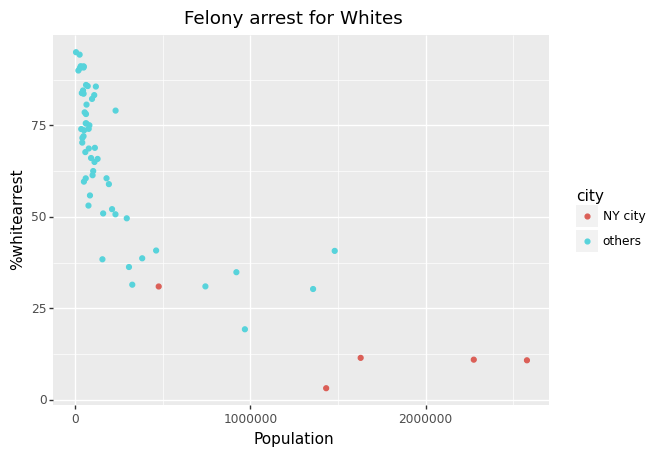

<ggplot: (7017255741)>

In [66]:
(ggplot(felony_df3, aes(x= 'Population', y='%whitearrest',color = 'city')) 
 + geom_point()
 + ggtitle('Felony arrest for Whites')
)

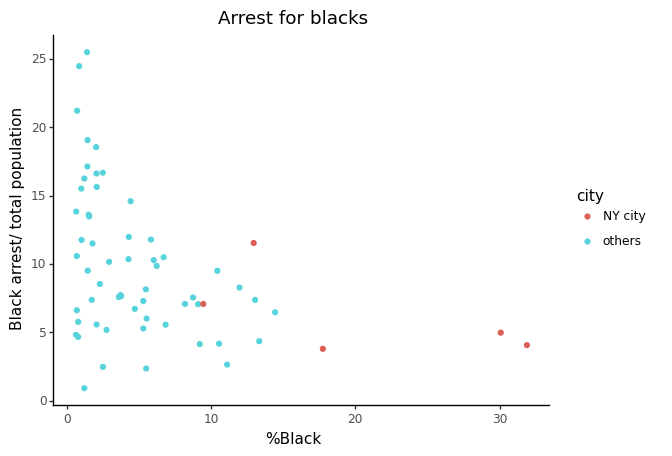

<ggplot: (7017001889)>

In [233]:

(ggplot(df3, aes(x= '%Black', y='blackarr/pop',color = 'city')) 
 + geom_point()
 + ggtitle('Arrest for blacks')
 + ylab('Black arrest/ total population')
 + theme_classic()
)

In [229]:
df3.dtypes

Total Arrests           int64
White                 float64
Black                 float64
Hispanic              float64
Asian                 float64
Other-Unknown         float64
Unnamed: 2             object
County                 object
Population            float64
%blackarrest          float64
%whitearrest          float64
%hisparrest           float64
%asianarrest          float64
Area                   object
%White                float64
%Black                float64
%Asian                float64
%Hispanic             float64
blackarr/pop          float64
whitearr/pop          float64
city                   object
dem                    object
arrests/population    float64
dtype: object

In [68]:
# Categorize counties based on white demographic
data = []

for c in df3['%White']:
    if (c > 50):
        data.append('white >50%')
    else:
        data.append('white <=50%')
        
# Add data to the felony dataset
df3['dem'] = data


In [69]:
df3['arrests/population'] = df3['Total Arrests']/df3['Population']

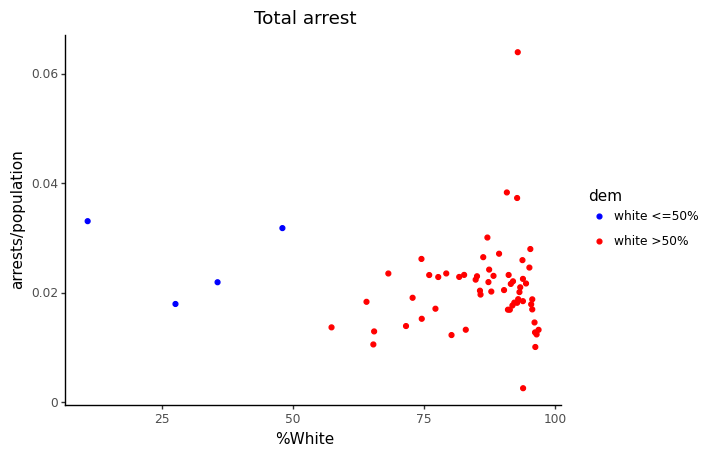

<ggplot: (300297517)>

In [70]:


(ggplot(df3, aes(x= '%White', y='arrests/population',color = 'dem'))
 + geom_point()
 + scale_color_manual(values={'white >50%':'red','white <=50%':'blue'})
 + ggtitle('Total arrest')
 + theme_classic()

)

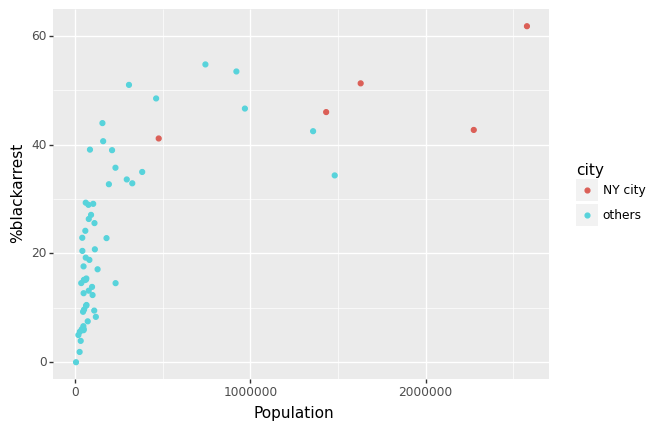

<ggplot: (300635053)>

In [71]:
ggplot(felony_df3, aes(x= 'Population', y='%blackarrest',color = 'city')) + geom_point()

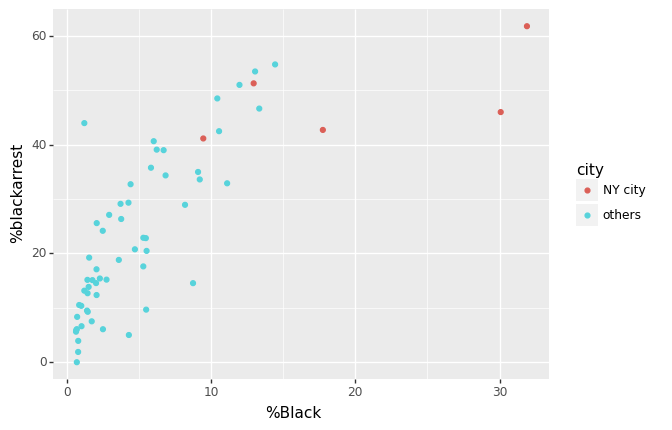

<ggplot: (7018025329)>

In [72]:
ggplot(felony_df3, aes(x= '%Black', y='%blackarrest',color = 'city')) + geom_point()

In [73]:
# use this to save data to spreadsheet
#felony_df2.to_excel(r'felony_df2.xlsx', index = False)

Plot by race

In [74]:
# Get only % arrest
felony_df4 = felony_df3[['County','Population','%White','%Black','%blackarrest','%whitearrest','%hisparrest','%asianarrest']]
felony_df4.head()

,County,Population,%White,%Black,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,[Albany],306585.0,75.985852,11.964340,50.958904,36.320939,9.941292,0.743640
1,[Allegany],46332.0,95.413313,1.009276,6.614786,91.050584,1.945525,0.389105
2,[Bronx],1432087.0,10.916766,30.083936,45.960206,3.216579,48.935223,1.233234
3,[Broome],191925.0,86.278166,4.411765,32.703081,58.963585,6.722689,0.560224
4,[Cattaraugus],76726.0,91.946910,1.202734,13.143872,74.067496,1.420959,0.532860


In [75]:
# Prepare data to plot
# Rearrange data 
felony_df5 = pd.melt(felony_df4, id_vars=['County','Population','%White','%Black'], var_name = 'race')
felony_df5.head()

,County,Population,%White,%Black,race,value
0,[Albany],306585.0,75.985852,11.964340,%blackarrest,50.958904
1,[Allegany],46332.0,95.413313,1.009276,%blackarrest,6.614786
2,[Bronx],1432087.0,10.916766,30.083936,%blackarrest,45.960206
3,[Broome],191925.0,86.278166,4.411765,%blackarrest,32.703081
4,[Cattaraugus],76726.0,91.946910,1.202734,%blackarrest,13.143872


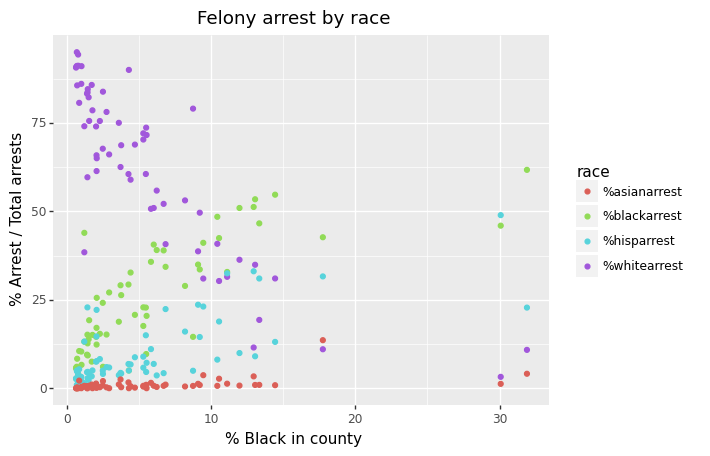

<ggplot: (7017925169)>

In [76]:
(ggplot(felony_df5, aes(x="%Black", y="value", color='race')) 
 + geom_point() 
 + ylab('% Arrest / Total arrests')
 + ggtitle('Felony arrest by race')
 + xlab('% Black in county')
)

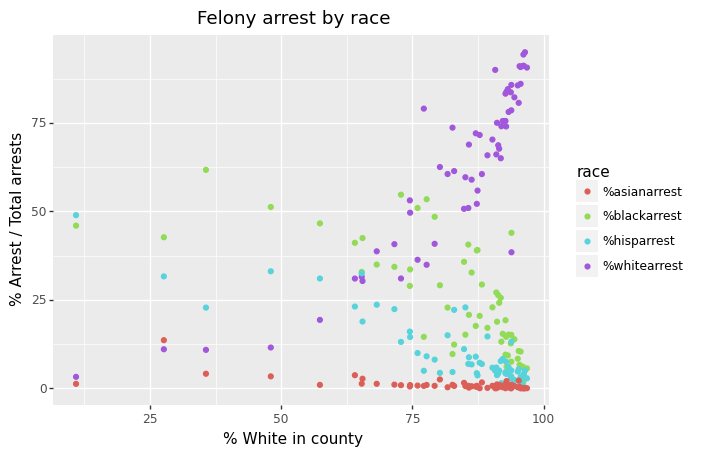

<ggplot: (281624105)>

In [232]:
(ggplot(felony_df5, aes(x="%White", y="value", color='race')) 
 + geom_point() 
 + ylab('% Arrest / Total arrests')
 + ggtitle('Felony arrest by race')
 + xlab('% White in county')
)

In [77]:
felony_df8 = felony_df3[['County','Population','%White','%White/%pop','%Black/%pop','%Hispanic/%pop','%Asian/%pop']]
felony_df8.head()

,County,Population,%White,%White/%pop,%Black/%pop,%Hispanic/%pop,%Asian/%pop
0,[Albany],306585.0,75.985852,47.799608,425.923246,202.733838,15.601258
1,[Allegany],46332.0,95.413313,95.427547,655.399423,142.127882,42.228683
2,[Bronx],1432087.0,10.916766,29.464575,152.773249,91.420800,36.086657
3,[Broome],191925.0,86.278166,68.341260,741.269841,198.963032,16.010963
4,[Cattaraugus],76726.0,91.946910,80.554632,1092.832688,84.852919,81.674983


In [78]:
felony_df9 = pd.melt(felony_df8, id_vars=['County','Population','%White'], var_name = 'race')
felony_df9.head()

,County,Population,%White,race,value
0,[Albany],306585.0,75.985852,%White/%pop,47.799608
1,[Allegany],46332.0,95.413313,%White/%pop,95.427547
2,[Bronx],1432087.0,10.916766,%White/%pop,29.464575
3,[Broome],191925.0,86.278166,%White/%pop,68.341260
4,[Cattaraugus],76726.0,91.946910,%White/%pop,80.554632


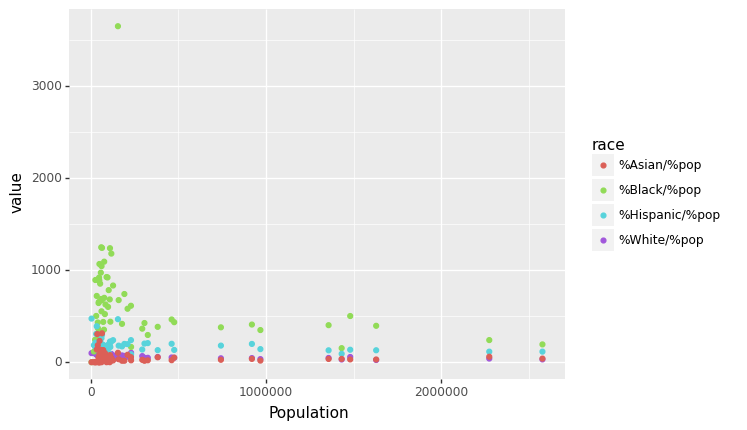

<ggplot: (7014833593)>

In [79]:
ggplot(felony_df9, aes(x="Population", y="value", color='race')) + geom_point()

In [80]:
felony_df3.iloc[:,1:15]

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic,%blackarrest
0,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,75.985852,11.964340,4.766538,4.903617,50.958904
1,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,95.413313,1.009276,0.921424,1.368855,6.614786
2,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,10.916766,30.083936,3.417423,53.527451,45.960206
3,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,86.278166,4.411765,3.499003,3.378863,32.703081
4,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,91.946910,1.202734,0.652415,1.674614,13.143872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,402,314.0,61.0,24.0,1.0,2,[Washington],61274.0,Washington,93.324475,2.742976,0.411288,2.287396,15.174129
58,410,271.0,111.0,24.0,0.0,4,[Wayne],90200.0,Wayne,90.984516,2.925180,0.495884,3.706863,27.073171
59,4023,777.0,1875.0,1248.0,38.0,85,[Westchester],968213.0,Westchester,57.375992,13.337190,5.386398,21.813209,46.607010
60,293,206.0,67.0,17.0,2.0,1,[Wyoming],40023.0,Wyoming,90.243150,5.297118,0.370063,2.951014,22.866894


In [81]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,...,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor,%White/%pop,%Black/%pop,%Hispanic/%pop,%Asian/%pop,city
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,...,50.958904,36.320939,9.941292,0.743640,0.004780,47.799608,425.923246,202.733838,15.601258,others
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,...,6.614786,91.050584,1.945525,0.389105,0.009543,95.427547,655.399423,142.127882,42.228683,others
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,...,45.960206,3.216579,48.935223,1.233234,0.002946,29.464575,152.773249,91.420800,36.086657,NY city
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,...,32.703081,58.963585,6.722689,0.560224,0.006834,68.341260,741.269841,198.963032,16.010963,others
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,...,13.143872,74.067496,1.420959,0.532860,0.008055,80.554632,1092.832688,84.852919,81.674983,others


Plot number or arrests of race / population of that race

In [82]:
felony_df3['whitear/whitepop'] = felony_df3['White']*100/(felony_df3['Population']*felony_df3['%White'])
felony_df3['blackar/blackpop'] = felony_df3['Black']*100/(felony_df3['Population']*felony_df3['%Black'])
felony_df3['asianar/asianpop'] = felony_df3['Asian']*100/(felony_df3['Population']*felony_df3['%Asian'])
felony_df3['hispear/hisppop'] = felony_df3['Hispanic']*100/(felony_df3['Population']*felony_df3['%Hispanic'])
felony_df3['logpop'] = np.log(felony_df3['Population'])

# Extract only columns of interest and name it as a new dataframe
felony_df7 = felony_df3[['County','logpop','whitear/whitepop','blackar/blackpop','asianar/asianpop','hispear/hisppop']]

felony_df10 = pd.melt(felony_df7, id_vars=['County','logpop'], var_name = 'race')
felony_df10.head()


,County,logpop,race,value
0,[Albany],12.633250,whitear/whitepop,0.003983
1,[Allegany],10.743588,whitear/whitepop,0.005293
2,[Bronx],14.174643,whitear/whitepop,0.003237
3,[Broome],12.164860,whitear/whitepop,0.005085
4,[Cattaraugus],11.247996,whitear/whitepop,0.005911


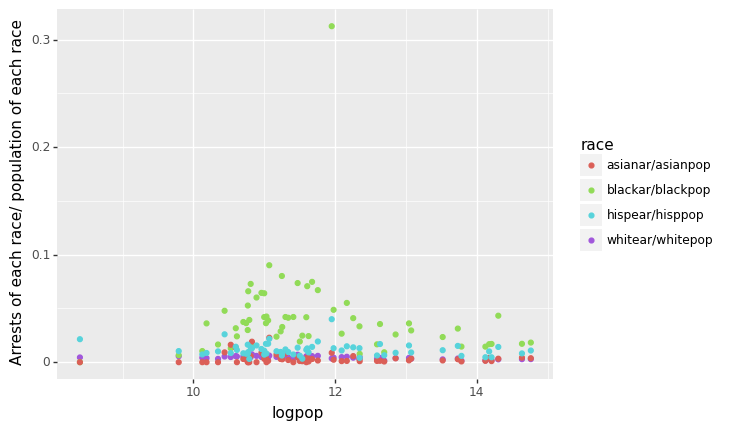

<ggplot: (7017526429)>

In [83]:
(ggplot(felony_df10, aes(x="logpop", y="value", color='race')) 
 + geom_point() 
 + ylab('Arrests of each race/ population of each race')
)

Plot a bar graph for number or arrests of race / population of that race

In [84]:
# Add up numbers for each race for all counties using felony_df7
toplot = felony_df7.sum()
toplot = toplot[2:10]
toplot.reset_index(drop=True,inplace=True)

In [85]:
toplot = pd.DataFrame(toplot)
race = ['white','black','asian','hispanic']
toplot['race'] = race
toplot.columns = ['value','race']

# convert to float first
toplot['value'] = toplot['value'].astype(float)
# round the numbers
toplot['value'] = round(toplot['value'],1)

Which race gets more felony arrests/ population?

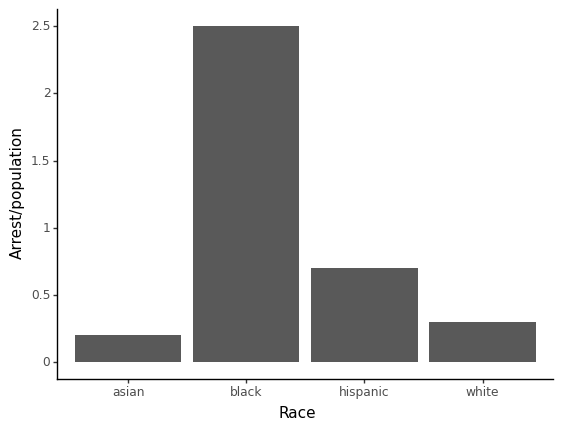

<ggplot: (7016920437)>

In [86]:

(ggplot(toplot, aes(x='race',y='value')) 
 + geom_col()
 + theme_classic()
 + xlab('Race')
 + ylab('Arrest/population')
)

## Get prison data

https://www.criminaljustice.ny.gov/crimnet/ojsa/comparison-population-arrests-prison-demographics.html

convert pdf to excel
https://simplypdf.com/Excel

In [87]:
xl2 = pd.ExcelFile('prison.xlsx')

sheetnames = xl2.sheet_names  # see all sheet names

sheets = sheetnames[4:66]


In [88]:
# run a loop to extract data from each sheet
data3 = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 2,nrows = 5)
    data3.append(countydata)


In [89]:
# Create new dataframe and add extracted data to it
prison_df = pd.DataFrame()
prison_df = prison_df.append(data3,True)

In [90]:
# Rename columns
prison_df.columns = ['race','population','%population','arrest','%arrest','felonyarrest','%felony','prison','%prison']
# Resulted dataframe
prison_df.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00


In [91]:
#prison_df2.to_excel(r'prison_df.xlsx', index = False)

In [92]:
# Get county name for each sheet
# Test for sheet #5
data = pd.read_excel('prison.xlsx', sheet_name = 5, skiprows = 0,nrows = 5)
data.columns[0]



'Allegany County'

In [93]:
# Get a list of county names from each sheet
counties = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 0,nrows = 5)
    countyname = countydata.columns[0]
    counties.append(countyname)

In [94]:
# Stack them so that it's in the same format as the rest of the data

countynames = counties
County = []
for c in countynames:
    countyname = c
    county = [[]] * 5
    county[0].append(c)
    County.append(county)
County = pd.DataFrame(County)
County = County.unstack()
# Make sure it is the right length (310)
len(County)

310

In [95]:
# Reset index
County.reset_index(drop=True, inplace = True)

In [96]:
County = County.sort_values()
County.reset_index(drop=True, inplace = True)

In [97]:
# Add the county labels to the dataset
prison_df['County'] = County

In [98]:
prison_df

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,[Albany County]
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,[Albany County]
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,[Albany County]
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,[Albany County]
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,[Albany County]
...,...,...,...,...,...,...,...,...,...,...
305,White,23532,0.95,300,0.94,100,0.94,17,0.85,[Yates County]
306,Black,220,0.01,9,0.03,2,0.02,1,0.05,[Yates County]
307,Hispanic,574,0.02,8,0.03,3,0.03,2,0.10,[Yates County]
308,Asian,201,0.01,0,0.00,0,0.00,0,0.00,[Yates County]


In [99]:
# Remove brackets and commas 
prison_df['County'] = prison_df['County'].str.join(', ')
prison_df = prison_df.replace(',','', regex=True)



In [100]:
prison_df.reset_index(drop=True, inplace = True)

In [101]:
prison_df

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany County
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany County
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany County
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany County
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany County
...,...,...,...,...,...,...,...,...,...,...
305,White,23532,0.95,300,0.94,100,0.94,17,0.85,Yates County
306,Black,220,0.01,9,0.03,2,0.02,1,0.05,Yates County
307,Hispanic,574,0.02,8,0.03,3,0.03,2,0.10,Yates County
308,Asian,201,0.01,0,0.00,0,0.00,0,0.00,Yates County


Add population of each county from felony_df3 dataset

In [102]:
# Make sure the data is in the same order as the prison dataset
felony_df3 = felony_df3.sort_values(by=['County'])
felony_df3.reset_index(drop=True,inplace=True)

In [103]:
tpopulation = felony_df3['Population']
tpop = []
for p in tpopulation:
    population = [[]] * 5
    population[0].append(p)
    tpop.append(population)
tpop = pd.DataFrame(tpop)

# Stack and reset index
tpop = tpop.stack()
tpop.reset_index(drop=True,inplace=True)

In [104]:
# Add the total population to  prison_df
prison_df['totpopulation'] = tpop

In [105]:
# Safe it as a different name in case we want to use unultered data later
prison_df2 = prison_df

In [106]:
# remove brackets from total population
prison_df2['totpopulation'] = prison_df2['totpopulation'].str[0]

In [107]:
# Check dtypes for each column
prison_df2.dtypes

race              object
population         int64
%population      float64
arrest             int64
%arrest          float64
felonyarrest       int64
%felony          float64
prison             int64
%prison          float64
County            object
totpopulation    float64
dtype: object

In [108]:
# Convert all the numeric columns to float
prison_df2['population'] = prison_df2['population'].astype(float)
prison_df2['arrest'] = prison_df2['arrest'].astype(float)
prison_df2['felonyarrest'] = prison_df2['felonyarrest'].astype(float)
prison_df2['prison'] = prison_df2['prison'].astype(float)


Add total arrest data using df2 dataset

In [109]:
df2.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275


In [110]:
# Make sure the data is in the same order as the prison dataset
df2 = df2.sort_values(by=['County'])
df2.reset_index(drop=True,inplace=True)

In [111]:
tarrests = df2['Total Arrests']
tarrest = []
for a in tarrests:
    arrest = [[]] * 5
    arrest[0].append(a)
    tarrest.append(arrest)
tarrest = pd.DataFrame(tarrest)

# Stack and reset index
tarrest = tarrest.stack()
tarrest.reset_index(drop=True,inplace=True)
# Add to prison dataset
prison_df2['totarrests'] = tarrest
prison_df2['totarrests'] = prison_df2['totarrests'].str[0]

In [112]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,306585.0,7132
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,306585.0,7132
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,306585.0,7132
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,306585.0,7132
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,306585.0,7132


In [113]:

# Calculate "R factor"

prison_df2['R factor arrest'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totarrests']/prison_df2['arrest'])




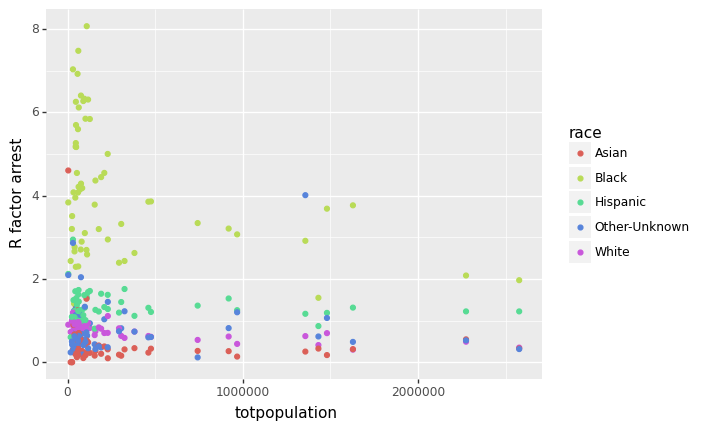

<ggplot: (7018223401)>

In [114]:
(ggplot(prison_df2, aes(x="totpopulation", y="R factor arrest", color='race')) 
 + geom_point() 
)

Calculate total prison numbers by adding up data from all races

In [115]:
tprison = []
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['prison']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tprison.append(mult)
# Put it in a dataframe
tprison = pd.DataFrame(tprison)
# Put it all in one column
tprison = tprison.stack()
# Reset index
tprison.reset_index(drop=True,inplace=True)
# Add it to the prison_df2 table
prison_df2['totprison'] = tprison
# Remove brackets
prison_df2['totprison'] = prison_df2['totprison'].str[0]


In [116]:
# Do the same for total felony arrest cases
tfelony = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['felonyarrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tfelony.append(mult)
tfelony = pd.DataFrame(tfelony)

tfelony = tfelony.stack()
tfelony.reset_index(drop=True,inplace=True)

prison_df2['totfelony'] = tfelony
prison_df2['totfelony'] = prison_df2['totfelony'].str[0]

In [117]:
#prison_df2.to_excel('prison_df2.xls', index = False)

In [118]:
# Add a column for % White of population for each county
perwhite = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "White")]
    toadd = rows['%population']
    tot = sum(toadd) # Using this sum funciton to strip unnecessary stuff
    mult = [[]] * 5
    mult[0].append(tot)
    perwhite.append(mult)
perwhite = pd.DataFrame(perwhite)

perwhite = perwhite.stack()
perwhite.reset_index(drop=True,inplace=True)
perwhite = perwhite.str[0]


In [119]:
# Add to prison_df2
prison_df2['perwhite'] = perwhite

In [120]:
prison_df2[1:15]

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest,totprison,totfelony,perwhite
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,306585.0,7132,3.320428,364.0,2555.0,0.72
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,306585.0,7132,1.445373,364.0,2555.0,0.72
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,306585.0,7132,0.156204,364.0,2555.0,0.72
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,306585.0,7132,0.814667,364.0,2555.0,0.72
5,White,43781.0,0.94,755.0,0.91,234.0,0.91,16.0,0.94,Allegany County,46332.0,830,0.962641,17.0,257.0,0.94
6,Black,593.0,0.01,55.0,0.07,17.0,0.07,0.0,0.00,Allegany County,46332.0,830,5.177391,17.0,257.0,0.94
7,Hispanic,779.0,0.02,12.0,0.01,5.0,0.02,1.0,0.06,Allegany County,46332.0,830,0.859898,17.0,257.0,0.94
8,Asian,593.0,0.01,3.0,0.00,1.0,0.00,0.0,0.00,Allegany County,46332.0,830,0.282403,17.0,257.0,0.94
9,Other-Unknown,684.0,0.01,5.0,0.01,0.0,0.00,0.0,0.00,Allegany County,46332.0,830,0.408053,17.0,257.0,0.94
10,White,130764.0,0.09,1781.0,0.04,506.0,0.03,28.0,0.03,Bronx County,1432087.0,47413,0.411384,1012.0,15731.0,0.09


In [121]:
# Calculate "R factor" for other category
prison_df2['R factor prison'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totprison']/prison_df2['prison'])

prison_df2['R factor felony'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totfelony']/prison_df2['felonyarrest'])


## Arrest and prison sentences 

Do less white people arrested go to prison?

yes, they do!

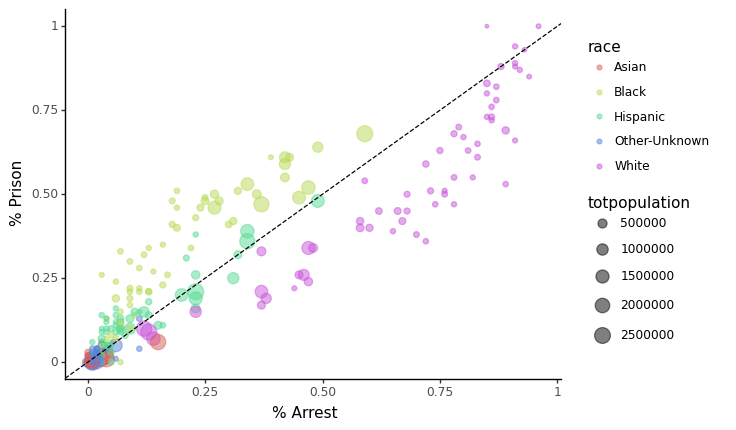

<ggplot: (7017373417)>

In [122]:

(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='totpopulation')) 
 + geom_point(alpha=0.5) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
 + xlab("% Arrest")
 + ylab("% Prison")
 + theme_classic()
)

If it was fair for all races, all the dots should line up on the dotted line

## Demographic of arrested people in white majority counties vs counties with whites < 50%

In [123]:
# Plot the arrest percentage for white majority and white minory couunties 
# Add a column white demographic for each county

whitedems = []
whiteper = prison_df2['perwhite']

for w in whiteper:
    if w > 0.5:
        racedem = 'white >0.5'
    else:
        racedem = 'white <=0.5'
    whitedems.append(racedem)    


prison_df2['whitedems'] = whitedems


In [124]:
prison_df2

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest,totprison,totfelony,perwhite,R factor prison,R factor felony,whitedems
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,306585.0,7132,0.631945,364.0,2555.0,0.72,0.362827,0.504934,white >0.5
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,306585.0,7132,3.320428,364.0,2555.0,0.72,4.758810,3.976187,white >0.5
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,306585.0,7132,1.445373,364.0,2555.0,0.72,2.112746,1.626648,white >0.5
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,306585.0,7132,0.156204,364.0,2555.0,0.72,0.000000,0.110460,white >0.5
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,306585.0,7132,0.814667,364.0,2555.0,0.72,0.000000,0.788338,white >0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532.0,0.95,300.0,0.94,100.0,0.94,17.0,0.85,Yates County,24951.0,319,0.997148,20.0,106.0,0.95,0.901256,1.000284,white >0.5
306,Black,220.0,0.01,9.0,0.03,2.0,0.02,1.0,0.05,Yates County,24951.0,319,3.199758,20.0,106.0,0.95,5.670682,2.139880,white >0.5
307,Hispanic,574.0,0.02,8.0,0.03,3.0,0.03,2.0,0.10,Yates County,24951.0,319,1.090123,20.0,106.0,0.95,4.346864,1.230245,white >0.5
308,Asian,201.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,Yates County,24951.0,319,0.000000,20.0,106.0,0.95,0.000000,0.000000,white >0.5


In [125]:
whitesum = prison_df2.groupby(['whitedems','race']).sum()
whitesum = whitesum.reset_index()
whitesum

,whitedems,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,totpopulation,totarrests,R factor arrest,totprison,totfelony,perwhite,R factor prison,R factor felony
0,white <=0.5,Asian,1184446.0,0.55,10926.0,0.24,3985.0,0.22,118.0,0.09,7913821.0,196740,1.520581,5230.0,74068.0,1.17,0.559690,1.418354
1,white <=0.5,Black,1804163.0,0.89,94525.0,1.88,38290.0,2.02,2809.0,2.16,7913821.0,196740,9.366711,5230.0,74068.0,1.17,10.746066,10.117039
2,white <=0.5,Hispanic,2360562.0,1.29,68001.0,1.40,24252.0,1.37,1901.0,1.44,7913821.0,196740,4.620197,5230.0,74068.0,1.17,4.717310,4.464244
3,white <=0.5,Other-Unknown,166253.0,0.08,1857.0,0.04,563.0,0.04,34.0,0.01,7913821.0,196740,1.945761,5230.0,74068.0,1.17,1.159290,1.578576
4,white <=0.5,White,2407145.0,1.17,21431.0,0.43,6978.0,0.37,368.0,0.29,7913821.0,196740,1.556722,5230.0,74068.0,1.17,1.089560,1.333690
5,white >0.5,Asian,525737.0,1.36,2196.0,0.46,693.0,0.43,30.0,0.18,11616530.0,212676,28.208431,8425.0,64148.0,48.86,17.498671,36.316927
6,white >0.5,Black,1029745.0,2.82,62527.0,10.08,23558.0,13.04,3696.0,17.96,11616530.0,212676,241.632472,8425.0,64148.0,48.86,533.276488,358.836466
7,white >0.5,Hispanic,1393568.0,3.71,28853.0,4.78,8749.0,5.13,1141.0,6.09,11616530.0,212676,75.098993,8425.0,64148.0,48.86,131.143782,107.455036
8,white >0.5,Other-Unknown,247211.0,1.30,4450.0,1.13,1289.0,1.03,113.0,0.83,11616530.0,212676,46.373300,8425.0,64148.0,48.86,51.921912,57.875594
9,white >0.5,White,8423379.0,48.86,114650.0,41.67,29859.0,38.43,3445.0,32.88,11616530.0,212676,48.666409,8425.0,64148.0,48.86,45.597349,54.019419


In [126]:
# Create a dataframe from groupby summary table

whiteminorows = whitesum[(whitesum.whitedems == 'white <=0.5')]
totarrestwhiteminority = sum(whiteminorows['arrest'])
whitemajrows = whitesum[(whitesum.whitedems == 'white >0.5')]
totarrestwhitemajority = sum(whitemajrows['arrest'])
whitemin = whiteminorows['arrest']/totarrestwhiteminority
whitemaj = whitemajrows['arrest']/totarrestwhitemajority
arrestwhite = pd.DataFrame(whitemin)
whitemaj.reset_index(drop=True, inplace = True)
arrestwhite['whitemaj'] = whitemaj
race = ['Asian','Black','Hispanic','Unknown','White']
arrestwhite['race'] = race
arrestwhite.columns = ['white <=0.5','white >0.5','race']
arrestwhite = pd.melt(arrestwhite, id_vars = ['race'], value_vars = ['white <=0.5','white >0.5'])
arrestwhite.columns = ['race','whitedem','arrestpercent']
arrestwhite['arrestpercent'] = arrestwhite['arrestpercent']*100
# Round up decimal 
arrestwhite['arrestpercent'] = round(arrestwhite['arrestpercent'],1)

arrestwhite

,race,whitedem,arrestpercent
0,Asian,white <=0.5,5.6
1,Black,white <=0.5,48.0
2,Hispanic,white <=0.5,34.6
3,Unknown,white <=0.5,0.9
4,White,white <=0.5,10.9
5,Asian,white >0.5,1.0
6,Black,white >0.5,29.4
7,Hispanic,white >0.5,13.6
8,Unknown,white >0.5,2.1
9,White,white >0.5,53.9


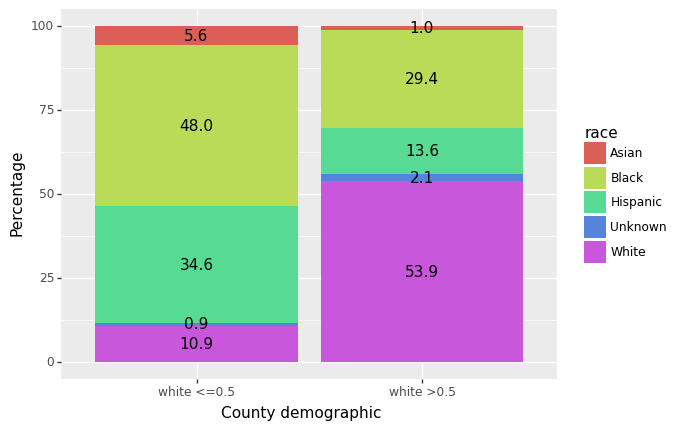

<ggplot: (7017967033)>

In [127]:

(ggplot(arrestwhite, aes(x='whitedem', y='arrestpercent', fill='race'))
 + geom_col() 
 + xlab('County demographic')
 + ylab('Percentage')
 + geom_text(aes(x='whitedem', y='arrestpercent', label='arrestpercent'),position = position_stack(vjust = 0.5))
)

In [128]:
prison_df2['arrest/population'] = prison_df2['arrest']/prison_df2['population']

In [129]:
prison_df2

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest,totprison,totfelony,perwhite,R factor prison,R factor felony,whitedems,arrest/population
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,306585.0,7132,0.631945,364.0,2555.0,0.72,0.362827,0.504934,white >0.5,0.014701
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,306585.0,7132,3.320428,364.0,2555.0,0.72,4.758810,3.976187,white >0.5,0.077242
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,306585.0,7132,1.445373,364.0,2555.0,0.72,2.112746,1.626648,white >0.5,0.033623
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,306585.0,7132,0.156204,364.0,2555.0,0.72,0.000000,0.110460,white >0.5,0.003634
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,306585.0,7132,0.814667,364.0,2555.0,0.72,0.000000,0.788338,white >0.5,0.018951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532.0,0.95,300.0,0.94,100.0,0.94,17.0,0.85,Yates County,24951.0,319,0.997148,20.0,106.0,0.95,0.901256,1.000284,white >0.5,0.012749
306,Black,220.0,0.01,9.0,0.03,2.0,0.02,1.0,0.05,Yates County,24951.0,319,3.199758,20.0,106.0,0.95,5.670682,2.139880,white >0.5,0.040909
307,Hispanic,574.0,0.02,8.0,0.03,3.0,0.03,2.0,0.10,Yates County,24951.0,319,1.090123,20.0,106.0,0.95,4.346864,1.230245,white >0.5,0.013937
308,Asian,201.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,Yates County,24951.0,319,0.000000,20.0,106.0,0.95,0.000000,0.000000,white >0.5,0.000000


In [130]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()


In [131]:
# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,'arrest/population']
whitearrpop = whitemean[['whitedems','race','arrest/population']]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['arrest/population'] - sem
whitearrpop['ymax'] = whitearrpop['arrest/population'] + sem
whitearrpop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,whitedems,race,arrest/population,sem,ymin,ymax
0,white <=0.5,Asian,0.009487,0.000775,0.008712,0.010261
1,white <=0.5,Black,0.062958,0.019210,0.043748,0.082168
2,white <=0.5,Hispanic,0.029801,0.004232,0.025570,0.034033
3,white <=0.5,Other-Unknown,0.013086,0.003053,0.010033,0.016138
4,white <=0.5,White,0.009947,0.001287,0.008660,0.011233
5,white >0.5,Asian,0.009463,0.001254,0.008210,0.010717
6,white >0.5,Black,0.082904,0.004915,0.077989,0.087819
7,white >0.5,Hispanic,0.025608,0.001145,0.024463,0.026753
8,white >0.5,Other-Unknown,0.014801,0.001251,0.013550,0.016052
9,white >0.5,White,0.016640,0.000591,0.016049,0.017231


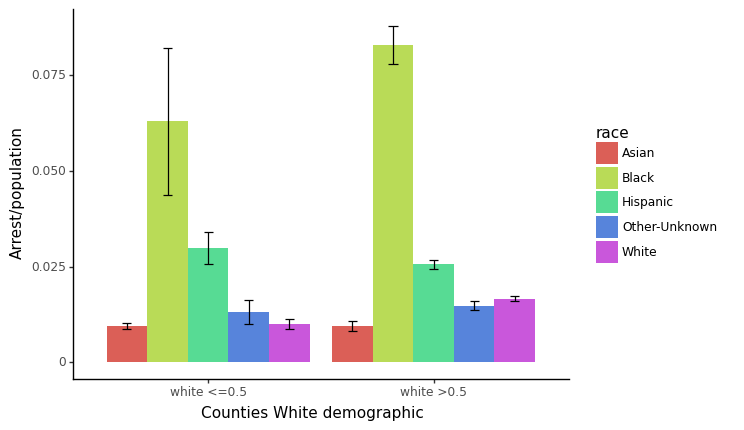

<ggplot: (7017379365)>

In [132]:
(ggplot(whitearrpop, aes(x='whitedems', y='arrest/population', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Arrest/population")
 + xlab("Counties White demographic")
)

In [133]:
# Add a column for % Black of population for each county

perblack = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "Black")]
    toadd = rows['%population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    perblack.append(mult)
perblack = pd.DataFrame(perblack)

perblack = perblack.stack()
perblack.reset_index(drop=True,inplace=True)
perblack = perblack.str[0]
prison_df2['perblack'] = perblack

/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


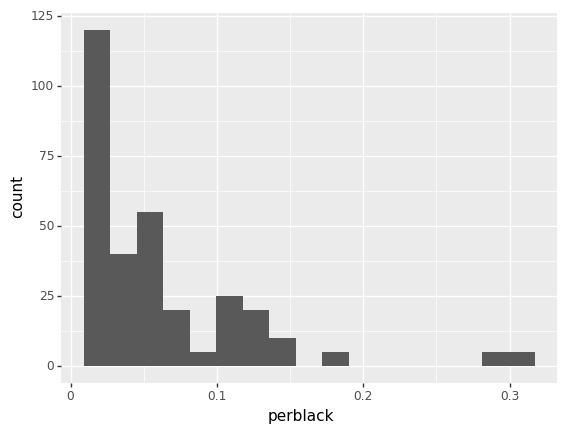

<ggplot: (7017918349)>

In [134]:
# Quick look at the distribution of counties/black demographic
(ggplot(prison_df2,aes(x='perblack')) 
 + geom_histogram()
)

In [135]:
# Create a column for black demographic for each county
blackdems = []
blackper = prison_df2['perblack']

for w in blackper:
    if w > 0.1:
        racedem = 'black >0.1'
    else:
        racedem = 'black <=0.1'
    blackdems.append(racedem)    


prison_df2['blackdems'] = blackdems

In [136]:
prison_df2

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,...,R factor arrest,totprison,totfelony,perwhite,R factor prison,R factor felony,whitedems,arrest/population,perblack,blackdems
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,...,0.631945,364.0,2555.0,0.72,0.362827,0.504934,white >0.5,0.014701,0.13,black >0.1
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,...,3.320428,364.0,2555.0,0.72,4.758810,3.976187,white >0.5,0.077242,0.13,black >0.1
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,...,1.445373,364.0,2555.0,0.72,2.112746,1.626648,white >0.5,0.033623,0.13,black >0.1
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,...,0.156204,364.0,2555.0,0.72,0.000000,0.110460,white >0.5,0.003634,0.13,black >0.1
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,...,0.814667,364.0,2555.0,0.72,0.000000,0.788338,white >0.5,0.018951,0.13,black >0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532.0,0.95,300.0,0.94,100.0,0.94,17.0,0.85,Yates County,...,0.997148,20.0,106.0,0.95,0.901256,1.000284,white >0.5,0.012749,0.01,black <=0.1
306,Black,220.0,0.01,9.0,0.03,2.0,0.02,1.0,0.05,Yates County,...,3.199758,20.0,106.0,0.95,5.670682,2.139880,white >0.5,0.040909,0.01,black <=0.1
307,Hispanic,574.0,0.02,8.0,0.03,3.0,0.03,2.0,0.10,Yates County,...,1.090123,20.0,106.0,0.95,4.346864,1.230245,white >0.5,0.013937,0.01,black <=0.1
308,Asian,201.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,Yates County,...,0.000000,20.0,106.0,0.95,0.000000,0.000000,white >0.5,0.000000,0.01,black <=0.1


In [154]:
# Summary for sum of black demographic
blacksum = prison_df2.groupby(['blackdems','race']).sum()
blacksum = blacksum.reset_index()
blacksum['race']

0            Asian
1            Black
2         Hispanic
3    Other-Unknown
4            White
5            Asian
6            Black
7         Hispanic
8    Other-Unknown
9            White
Name: race, dtype: object

In [138]:
# Create data table for stack bar

blackminorows = blacksum[(blacksum.blackdems == 'black <=0.1')]
totarrestblackminority = sum(blackminorows['arrest'])
blackmajrows = blacksum[(blacksum.blackdems == 'black >0.1')]
totarrestblackmajority = sum(blackmajrows['arrest'])
blackmin = blackminorows['arrest']/totarrestblackminority
blackmaj = blackmajrows['arrest']/totarrestblackmajority
arrestblack = pd.DataFrame(blackmin)
blackmaj.reset_index(drop=True, inplace = True)
arrestblack['blackmaj'] = blackmaj
race = ['Asian','Black','Hispanic','Unknown','White']
arrestblack['race'] = race
arrestblack.columns = ['black <=0.1','black >0.1','race']
arrestblack = pd.melt(arrestblack, id_vars = ['race'], value_vars = ['black <=0.1','black >0.1'])
arrestblack.columns = ['race','blackdem','arrestpercent']
arrestblack['arrestpercent'] = arrestblack['arrestpercent']*100
arrestblack['arrestpercent'] = round(arrestblack['arrestpercent'],1)

arrestblack

,race,blackdem,arrestpercent
0,Asian,black <=0.1,0.8
1,Black,black <=0.1,21.3
2,Hispanic,black <=0.1,12.1
3,Unknown,black <=0.1,1.8
4,White,black <=0.1,64.0
5,Asian,black >0.1,4.2
6,Black,black >0.1,45.8
7,Hispanic,black >0.1,28.7
8,Unknown,black >0.1,1.4
9,White,black >0.1,19.8


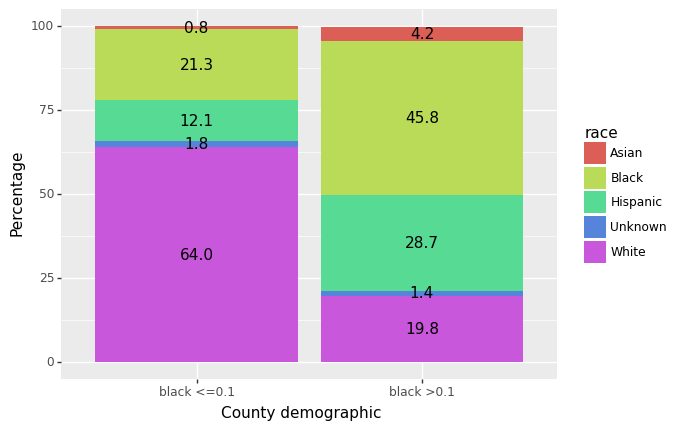

<ggplot: (7017227329)>

In [139]:
(ggplot(arrestblack, aes(x='blackdem', y='arrestpercent', fill='race'))
 + geom_col() 
 + xlab('County demographic')
 + ylab('Percentage')
 + geom_text(aes(x='blackdem', y='arrestpercent', label='arrestpercent'),position = position_stack(vjust = 0.5))
)

In [140]:
# Get the summary for mean
blackmean = prison_df2.groupby(['blackdems','race']).mean()
blackmean = blackmean.reset_index()
blackarrpop = blackmean[['blackdems','race','arrest/population']]
blackarrpop

,blackdems,race,arrest/population
0,black <=0.1,Asian,0.010402
1,black <=0.1,Black,0.087093
2,black <=0.1,Hispanic,0.025970
3,black <=0.1,Other-Unknown,0.014380
4,black <=0.1,White,0.017563
5,black >0.1,Asian,0.005558
6,black >0.1,Black,0.058801
7,black >0.1,Hispanic,0.025499
8,black >0.1,Other-Unknown,0.015985
9,black >0.1,White,0.010566


In [141]:
# Create data table for the bar graph

blacksem = prison_df2.groupby(['blackdems','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,'arrest/population']
blackarrpop = blackmean[['blackdems','race','arrest/population']]
blackarrpop['sem'] = sem
blackarrpop['ymin'] = blackarrpop.loc[:,'arrest/population'] - sem
blackarrpop['ymax'] = blackarrpop.loc[:,'arrest/population'] + sem
blackarrpop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,blackdems,race,arrest/population,sem,ymin,ymax
0,black <=0.1,Asian,0.010402,0.001407,0.008996,0.011809
1,black <=0.1,Black,0.087093,0.005340,0.081753,0.092432
2,black <=0.1,Hispanic,0.025970,0.001227,0.024743,0.027197
3,black <=0.1,Other-Unknown,0.014380,0.001190,0.013190,0.015570
4,black <=0.1,White,0.017563,0.000552,0.017010,0.018115
5,black >0.1,Asian,0.005558,0.000985,0.004573,0.006543
6,black >0.1,Black,0.058801,0.007870,0.050932,0.066671
7,black >0.1,Hispanic,0.025499,0.002645,0.022854,0.028144
8,black >0.1,Other-Unknown,0.015985,0.003694,0.012291,0.019679
9,black >0.1,White,0.010566,0.000954,0.009611,0.011520


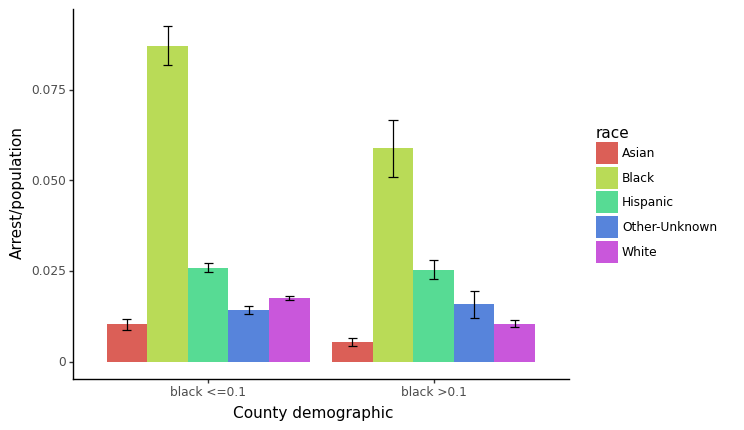

<ggplot: (7017391629)>

In [142]:
(ggplot(blackarrpop, aes(x='blackdems', y='arrest/population', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 + ylab('Arrest/population')
 + xlab('County demographic')
 # dodge puts it at the right place
 + theme_classic()
)

Change the cutoff to 20% black

In [143]:

blackdems = []
blackper = prison_df2['perblack']

for w in blackper:
    if w > 0.1:
        racedem = 'black >0.2'
    else:
        racedem = 'black <=0.2'
    blackdems.append(racedem)    


prison_df2['blackdems2'] = blackdems


In [144]:
blackmean

,blackdems,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,totpopulation,totarrests,R factor arrest,totprison,totfelony,perwhite,R factor prison,R factor felony,arrest/population,perblack
0,black <=0.1,Asian,4132.660000,0.018800,20.820000,0.007200,7.280000,0.006800,0.260000,0.002600,1.303312e+05,2495.94,0.531722,103.760000,702.920000,0.868800,0.331272,0.698485,0.010402,0.0364
1,black <=0.1,Black,7638.560000,0.038400,531.400000,0.144800,199.380000,0.194200,38.620000,0.277600,1.303312e+05,2495.94,4.341145,103.760000,702.920000,0.868800,10.023635,6.651079,0.087093,0.0364
2,black <=0.1,Hispanic,13894.580000,0.056400,302.520000,0.071000,89.360000,0.077400,13.320000,0.096800,1.303312e+05,2495.94,1.293724,103.760000,702.920000,0.868800,2.395178,1.940483,0.025970,0.0364
3,black <=0.1,Other-Unknown,2805.000000,0.022200,44.040000,0.019200,12.980000,0.017200,1.340000,0.014400,1.303312e+05,2495.94,0.747158,103.760000,702.920000,0.868800,0.916579,0.990291,0.014380,0.0364
4,black <=0.1,White,101644.680000,0.864800,1595.460000,0.760000,418.420000,0.705800,54.600000,0.607400,1.303312e+05,2495.94,0.877522,103.760000,702.920000,0.868800,0.864413,1.013141,0.017563,0.0364
5,black >0.1,Asian,125295.833333,0.080833,1006.750000,0.028333,359.500000,0.025833,11.250000,0.011667,1.084482e+06,23718.25,0.261908,705.583333,8589.166667,0.549167,0.124565,0.234254,0.005558,0.1575
6,black >0.1,Black,204331.666667,0.149167,10873.500000,0.393333,4323.250000,0.445833,381.166667,0.520000,1.084482e+06,23718.25,2.828493,705.583333,8589.166667,0.549167,3.570065,3.033296,0.058801,0.1575
7,black >0.1,Hispanic,254950.083333,0.181667,6810.666667,0.219167,2377.750000,0.219167,198.000000,0.224167,1.084482e+06,23718.25,1.252748,705.583333,8589.166667,0.549167,1.341848,1.241262,0.025499,0.1575
8,black >0.1,Other-Unknown,22767.833333,0.022500,342.083333,0.017500,100.250000,0.017500,6.666667,0.010000,1.084482e+06,23718.25,0.913431,705.583333,8589.166667,0.549167,0.604354,0.828303,0.015985,0.1575
9,black >0.1,White,479024.166667,0.565833,4692.333333,0.341667,1326.333333,0.292500,90.250000,0.233333,1.084482e+06,23718.25,0.528921,705.583333,8589.166667,0.549167,0.288853,0.391340,0.010566,0.1575


In [145]:
blackmean = prison_df2.groupby(['blackdems2','race']).mean()
blackmean = blackmean.reset_index()

blackarrpop = blackmean[['blackdems2','race','arrest/population']]

blacksem = prison_df2.groupby(['blackdems2','race']).sem()
blacksem = blacksem.reset_index()
sem = blacksem.loc[:,'arrest/population']
blackarrpop = blackmean[['blackdems2','race','arrest/population']]
blackarrpop['sem'] = sem
blackarrpop['ymin'] = blackarrpop.loc[:,'arrest/population'] - sem
blackarrpop['ymax'] = blackarrpop.loc[:,'arrest/population'] + sem
blackarrpop


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,blackdems2,race,arrest/population,sem,ymin,ymax
0,black <=0.2,Asian,0.010402,0.001407,0.008996,0.011809
1,black <=0.2,Black,0.087093,0.005340,0.081753,0.092432
2,black <=0.2,Hispanic,0.025970,0.001227,0.024743,0.027197
3,black <=0.2,Other-Unknown,0.014380,0.001190,0.013190,0.015570
4,black <=0.2,White,0.017563,0.000552,0.017010,0.018115
5,black >0.2,Asian,0.005558,0.000985,0.004573,0.006543
6,black >0.2,Black,0.058801,0.007870,0.050932,0.066671
7,black >0.2,Hispanic,0.025499,0.002645,0.022854,0.028144
8,black >0.2,Other-Unknown,0.015985,0.003694,0.012291,0.019679
9,black >0.2,White,0.010566,0.000954,0.009611,0.011520


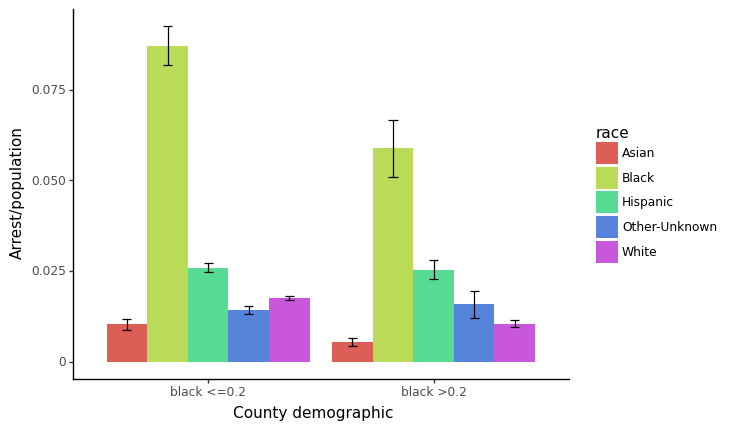

<ggplot: (7018072785)>

In [146]:
(ggplot(blackarrpop, aes(x='blackdems2', y='arrest/population', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 + ylab('Arrest/population')
 + xlab('County demographic')
 # dodge puts it at the right place
 + theme_classic()
)

In [147]:
# Take the log of the population
prison_df2['logpop'] = np.log10(prison_df2['population'])

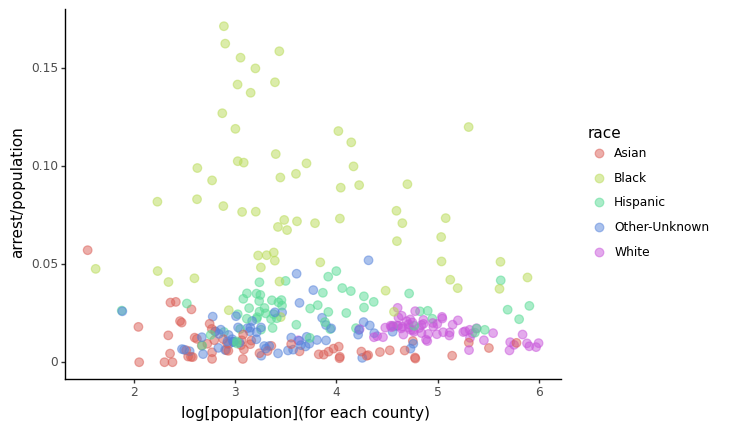

<ggplot: (301205413)>

In [148]:
(ggplot(prison_df2, aes(x="logpop", y="arrest/population", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('log[population](for each county)')
 + theme_classic()
)

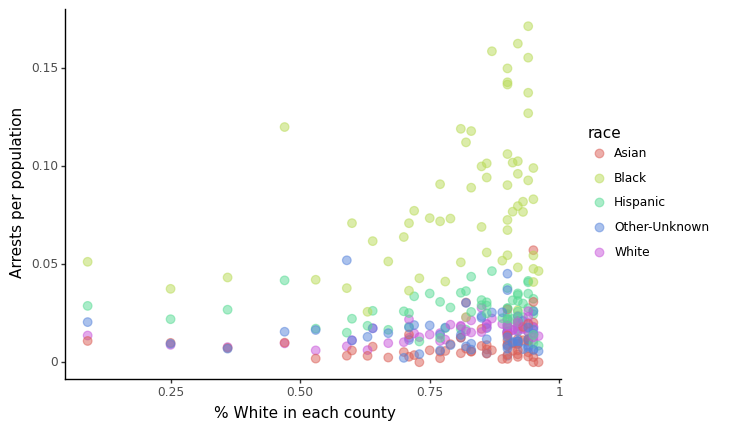

<ggplot: (7017919193)>

In [149]:
# Plot the arrest per population for each race
(ggplot(prison_df2, aes(x="perwhite", y="arrest/population", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('Arrests per population')
 + theme_classic()
)

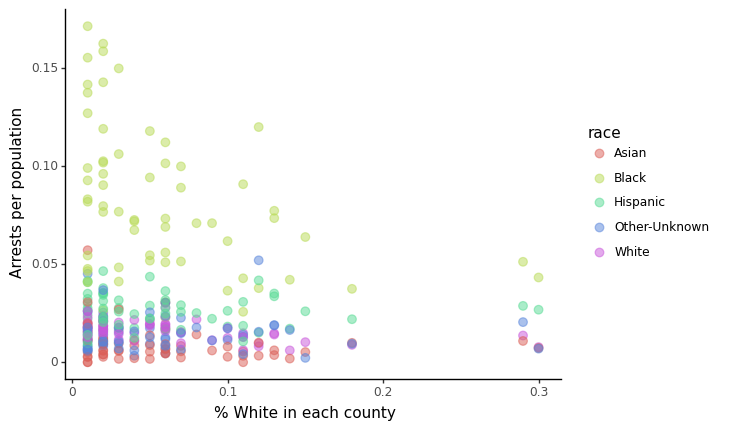

<ggplot: (7016997289)>

In [231]:
# Plot the arrest per population for each race
(ggplot(prison_df2, aes(x="perblack", y="arrest/population", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% black in each county')
 + ylab('Arrests per population')
 + theme_classic()
)

Calculate an "unfairness" factor.

Unfairness factor = % arrest/ % population (for each race)

Unfairness factor should be 1 if arrests were fair for all race. 

In [150]:
prison_df2

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,...,totfelony,perwhite,R factor prison,R factor felony,whitedems,arrest/population,perblack,blackdems,blackdems2,logpop
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,...,2555.0,0.72,0.362827,0.504934,white >0.5,0.014701,0.13,black >0.1,black >0.2,5.343474
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,...,2555.0,0.72,4.758810,3.976187,white >0.5,0.077242,0.13,black >0.1,black >0.2,4.594304
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,...,2555.0,0.72,2.112746,1.626648,white >0.5,0.033623,0.13,black >0.1,black >0.2,4.272700
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,...,2555.0,0.72,0.000000,0.110460,white >0.5,0.003634,0.13,black >0.1,black >0.2,4.314710
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,...,2555.0,0.72,0.000000,0.788338,white >0.5,0.018951,0.13,black >0.1,black >0.2,3.898451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532.0,0.95,300.0,0.94,100.0,0.94,17.0,0.85,Yates County,...,106.0,0.95,0.901256,1.000284,white >0.5,0.012749,0.01,black <=0.1,black <=0.2,4.371659
306,Black,220.0,0.01,9.0,0.03,2.0,0.02,1.0,0.05,Yates County,...,106.0,0.95,5.670682,2.139880,white >0.5,0.040909,0.01,black <=0.1,black <=0.2,2.342423
307,Hispanic,574.0,0.02,8.0,0.03,3.0,0.03,2.0,0.10,Yates County,...,106.0,0.95,4.346864,1.230245,white >0.5,0.013937,0.01,black <=0.1,black <=0.2,2.758912
308,Asian,201.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,Yates County,...,106.0,0.95,0.000000,0.000000,white >0.5,0.000000,0.01,black <=0.1,black <=0.2,2.303196


In [151]:
p = prison_df2[(prison_df2.County == 'Albany County')]
toadd = p['population']
tot = sum(toadd)
tot

307117.0

In [169]:
# re-calculate % population because the original data is missing decimal points
recalcpop = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['population']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['population']
        totr = sum(rpop)
        percent = totr/tot
        recalcpop.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%pop'] = recalcpop


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [170]:
# re-calculate % arrest to be exact
recalcarrest = []
race = ['White','Black','Hispanic','Asian','Other-Unknown' ]
# Extract data for each county and sum up numbers
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['arrest']
    tot = sum(toadd)
    for r in race:
        racerow = rows[(prison_df2.race == r)]
        rpop = racerow['arrest']
        totr = sum(rpop)
        percent = totr/tot
        recalcarrest.append(percent)

# Add it to the prison_df2 table
prison_df2['recalc%arrest'] = recalcarrest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [171]:
# Calculate an unfair factor and name it 'ratio'
prison_df2['ratio'] = (prison_df2['recalc%arrest']+0.001)/(prison_df2['recalc%pop']+0.001)


In [172]:
prison_df2.to_excel('prison_df3.xls',index=False)

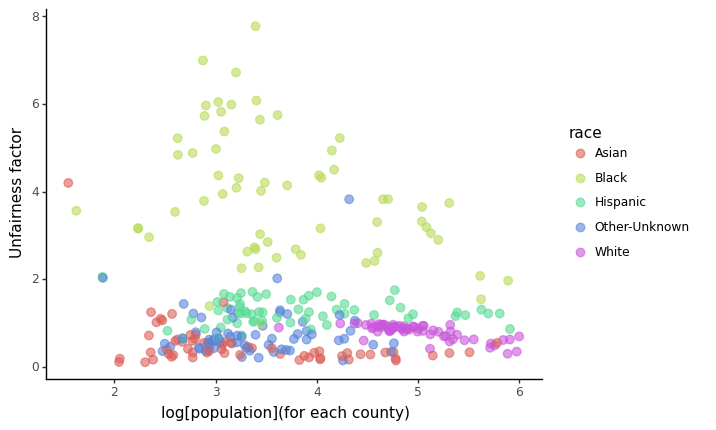

<ggplot: (7017948133)>

In [178]:
(ggplot(prison_df2, aes(x="logpop", y="ratio", color='race')) 
 + geom_point(size=3,alpha=0.6) 
 + xlab('log[population](for each county)')
 + ylab('Unfairness factor')
 + theme_classic()
)

In [179]:
# Find out what the asian outlier is all about 
weird  = prison_df2[(prison_df2['ratio']>4)&(prison_df2.race=='Asian') ]
weird

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,...,R factor felony,whitedems,arrest/population,perblack,blackdems,blackdems2,logpop,ratio,recalc%pop,recalc%arrest
103,Asian,35.0,0.01,2.0,0.04,0.0,0.0,0.0,0.0,Hamilton County,...,0.0,white >0.5,0.057143,0.01,black <=0.1,black <=0.2,1.544068,4.201206,0.007894,0.036364


In [182]:
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum['ratio'].tolist()
meanratio = mean[['race','ratio']]
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['ratio'] - meanratio['sem']
meanratio['ymax'] = meanratio['ratio'] + meanratio['sem']




In [209]:
meanratio

,race,ratio,sem,ymin,ymax
0,Asian,0.512190,0.071063,0.441127,0.583253
1,Black,3.904545,0.186440,3.718105,4.090985
2,Hispanic,1.266627,0.036639,1.229988,1.303267
3,Other-Unknown,0.770973,0.069778,0.701195,0.840751
4,White,0.810015,0.021686,0.788329,0.831700


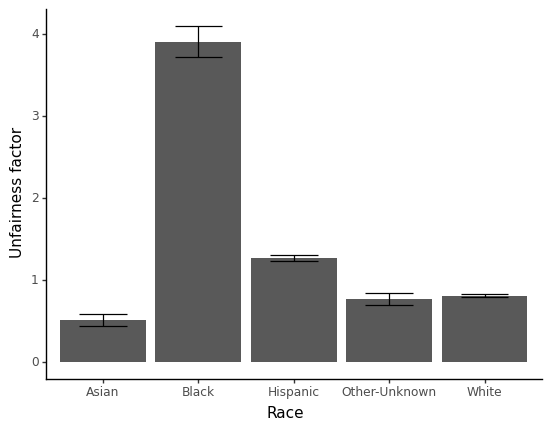

<ggplot: (7018215765)>

In [213]:

(ggplot(meanratio, aes(x='race',y='ratio')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('Unfairness factor')
)

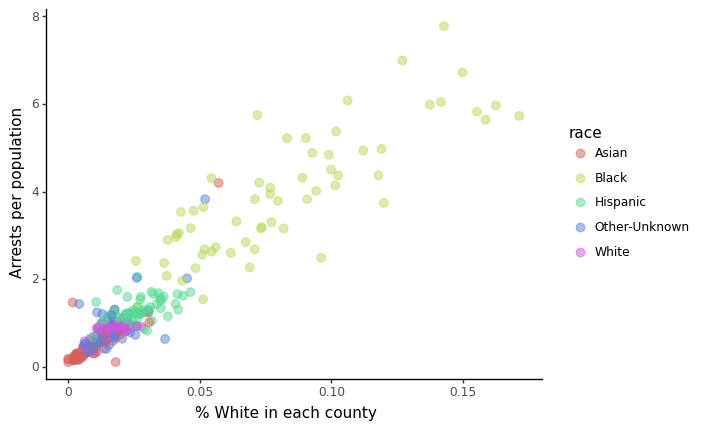

<ggplot: (7017811821)>

In [218]:
# Plot the unfairness factor per population for each race
(ggplot(prison_df2, aes(x="arrest/population", y="ratio", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('Arrests per population')
 + theme_classic()
)

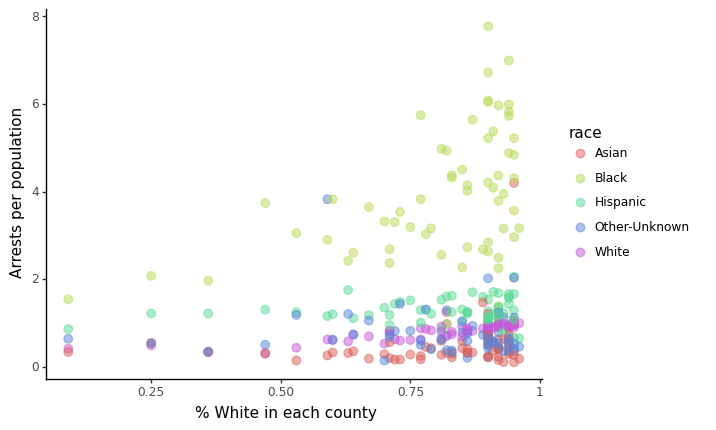

<ggplot: (7017813089)>

In [217]:
(ggplot(prison_df2, aes(x="perwhite", y="ratio", color='race')) 
 + geom_point(size=3,alpha=0.5) 
 + xlab('% White in each county')
 + ylab('Arrests per population')
 + theme_classic()
)

In [219]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,...,R factor felony,whitedems,arrest/population,perblack,blackdems,blackdems2,logpop,ratio,recalc%pop,recalc%arrest
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany County,...,0.504934,white >0.5,0.014701,0.13,black >0.1,black >0.2,5.343474,0.633551,0.718075,0.454571
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany County,...,3.976187,white >0.5,0.077242,0.13,black >0.1,black >0.2,4.594304,3.308149,0.127938,0.425547
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany County,...,1.626648,white >0.5,0.033623,0.13,black >0.1,black >0.2,4.272700,1.440659,0.061009,0.088334
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany County,...,0.110460,white >0.5,0.003634,0.13,black >0.1,black >0.2,4.314710,0.168842,0.067206,0.010516
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany County,...,0.788338,white >0.5,0.018951,0.13,black >0.1,black >0.2,3.898451,0.822950,0.025772,0.021032


In [220]:
# Get the mean with groupby
whitemean = prison_df2.groupby(['whitedems','race']).mean()
whitemean = whitemean.reset_index()

# Calculate standard error (sem)
whitesem = prison_df2.groupby(['whitedems','race']).sem()
whitesem = whitesem.reset_index()
sem = whitesem.loc[:,'ratio']
whitearrpop = whitemean[['whitedems','race','ratio']]
whitearrpop['sem'] = sem
# get ymin and ymax for errorbars
whitearrpop['ymin'] = whitearrpop['ratio'] - sem
whitearrpop['ymax'] = whitearrpop['ratio'] + sem
whitearrpop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,whitedems,race,ratio,sem,ymin,ymax
0,white <=0.5,Asian,0.387781,0.054901,0.332879,0.442682
1,white <=0.5,Black,2.335089,0.483856,1.851233,2.818945
2,white <=0.5,Hispanic,1.155395,0.097955,1.057441,1.253350
3,white <=0.5,Other-Unknown,0.511492,0.061884,0.449608,0.573376
4,white <=0.5,White,0.392475,0.041550,0.350924,0.434025
5,white >0.5,Asian,0.520770,0.075803,0.444967,0.596573
6,white >0.5,Black,4.012784,0.189021,3.823763,4.201805
7,white >0.5,Hispanic,1.274298,0.038534,1.235764,1.312833
8,white >0.5,Other-Unknown,0.788868,0.073953,0.714915,0.862821
9,white >0.5,White,0.838811,0.017499,0.821311,0.856310


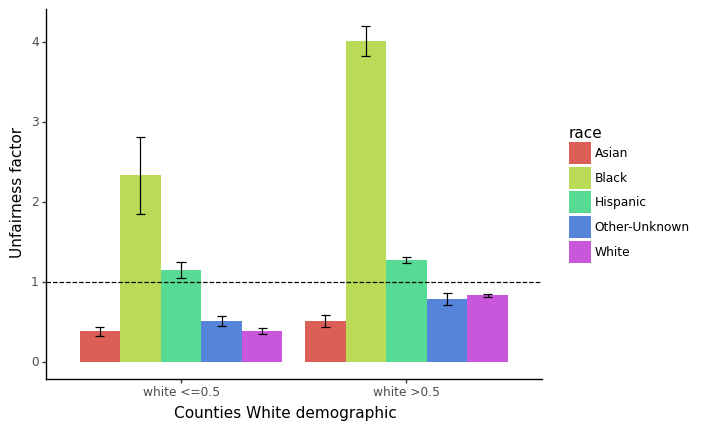

<ggplot: (7018289793)>

In [224]:
(ggplot(whitearrpop, aes(x='whitedems', y='ratio', fill='race')) 
 + geom_bar(position=position_dodge(), stat="identity") 
 + geom_errorbar(aes(ymin='ymin', ymax='ymax'),
                 width=.2,position=position_dodge(.9))
 # dodge puts it at the right place
 + theme_classic()
 + ylab("Unfairness factor")
 + xlab("Counties White demographic")
 + geom_hline(yintercept=1,linetype='dashed')
)

In [225]:
mean = prison_df2.groupby('race').mean()
mean = mean.reset_index()
semsum = prison_df2.groupby('race').sem()
# extract standard error as list
sem = semsum['arrest/population'].tolist()
meanratio = mean[['race','arrest/population']]
meanratio['sem'] = sem
meanratio['ymin'] = meanratio['arrest/population'] - meanratio['sem']
meanratio['ymax'] = meanratio['arrest/population'] + meanratio['sem']




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

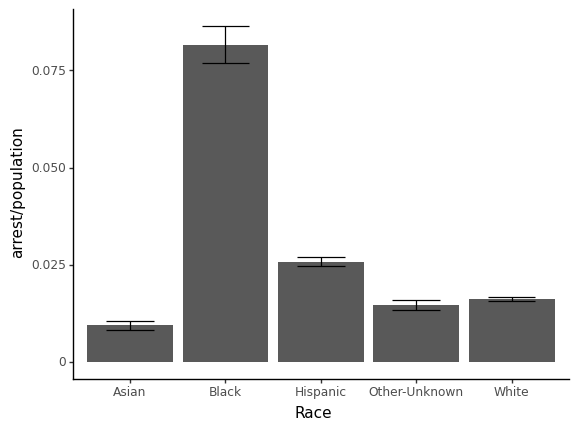

<ggplot: (7017015669)>

In [226]:

(ggplot(meanratio, aes(x='race',y='arrest/population')) 
 + geom_col()
 + theme_classic()
 + geom_errorbar(aes(x='race',ymin='ymin',ymax='ymax'))
 + xlab('Race')
 + ylab('arrest/population')
)